In [1]:
import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from FlowStability import SparseClustering, FlowIntegralClustering, run_multi_louvain, avg_norm_var_information
import parallel_clustering
import pickle

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotx

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
from scipy.sparse.linalg import eigsh

from SparseStochMat import sparse_autocov_mat

import auxiliary_functions

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [2]:
net_rw = ContTempNetwork.load('/home/b/skoove/Desktop/entropy/paper_data/socio_pat_primary_school/primaryschoolnet',
                              attributes_list=['node_to_label_dict',
                      'events_table',
                      'times',
                      'time_grid',
                      'num_nodes',
                      '_overlapping_events_merged',
                      'start_date',
                      'node_label_array',
                      'male_array',
                      'female_array',
                      'node_first_start_array',
                      'node_last_end_array',
                      'node_class_array',
                      'datetimes'])

In [3]:
net_times_hours = net_rw.times / 3600

In [23]:
selected_lamdas = np.logspace(-5,0,10)
windows = [6, 30, 90, 180]

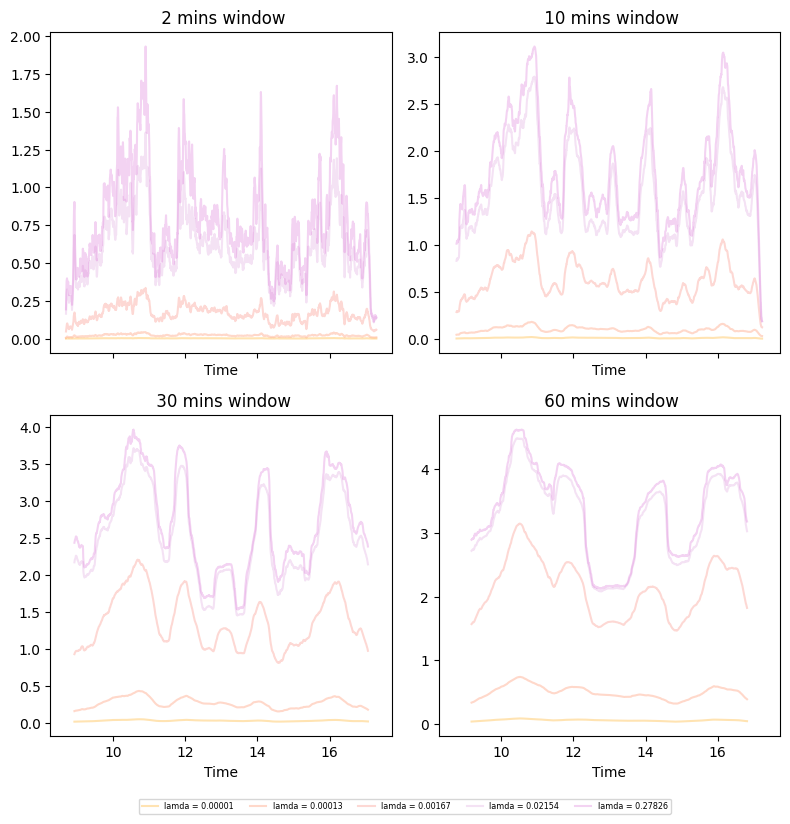

In [24]:
#Plot 5
list_colors = ['orange', 'coral', 'salmon', 'plum', 'orchid', 'purple', 'brown', 'olive', 'green', 'lightseagreen']
indices_plot = [[0,0], [0,1], [1,0], [1,1]]


fig, ax = plt.subplots(2,2, figsize = (8, 8), sharex=True)
for j, window in enumerate(windows):
    window_S_selected = []
    for i, lamda in enumerate(selected_lamdas):
        with open(f'//scratch/tmp/180/skoove/primaryschoolnet_rw/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
            S_rate = pickle.load(f)
            window_S_selected.append(S_rate['window_S'][f'{lamda:.11f}'])

    if j == 0:
        for i, lamda in enumerate(selected_lamdas):
            S = window_S_selected[i]
            ax[indices_plot[j][0], indices_plot[j][1]].plot(net_times_hours[(window // 2)+1 :1556- (window // 2)], S[1:1556-window], color = list_colors[i], alpha = 0.30, label='lamda = ' + f'{lamda:.5f}')
            ax[indices_plot[j][0], indices_plot[j][1]].set_xlabel('Time')
    else:
        for i, lamda in enumerate(selected_lamdas):
            S = window_S_selected[i]
            ax[indices_plot[j][0], indices_plot[j][1]].plot(net_times_hours[(window // 2)+1 :1556- (window // 2)], S[1:1556-window], color = list_colors[i], alpha = 0.30)
            ax[indices_plot[j][0], indices_plot[j][1]].set_xlabel('Time')

    ax[indices_plot[j][0], indices_plot[j][1]].set_title(f' {window // 3} mins window')
    

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize='xx-small', bbox_to_anchor=(0.85,0), ncol=5)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/primary_school/primary_school_windows.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()

# For Talk

In [27]:
windows = [6, 90, 180]
selected_lamdas = np.logspace(-5,0,10)
selected_lamdas = selected_lamdas[range(0, len(selected_lamdas), 2)]

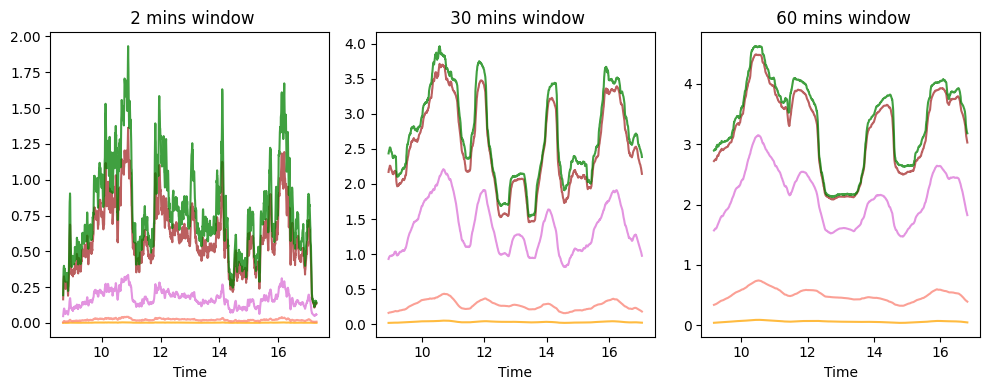

In [32]:
#Plot 5
list_colors = ['orange',  'salmon',  'orchid',  'brown', 'green', 'lightseagreen']
indices_plot = [0, 1, 2]


fig, ax = plt.subplots(1, 3, figsize = (10, 4))
for j, window in enumerate(windows):
    window_S_selected = []
    for i, lamda in enumerate(selected_lamdas):
        with open(f'//scratch/tmp/180/skoove/primaryschoolnet_rw/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
            S_rate = pickle.load(f)
            window_S_selected.append(S_rate['window_S'][f'{lamda:.11f}'])

    if j == 0:
        for i, lamda in enumerate(selected_lamdas):
            S = window_S_selected[i]
            ax[indices_plot[j]].plot(net_times_hours[(window // 2)+1 :1556- (window // 2)], S[1:1556-window], color = list_colors[i], alpha = 0.75, label='lamda = ' + f'{lamda:.5f}')
            ax[indices_plot[j]].set_xlabel('Time')
    else:
        for i, lamda in enumerate(selected_lamdas):
            S = window_S_selected[i]
            ax[indices_plot[j]].plot(net_times_hours[(window // 2)+1 :1556- (window // 2)], S[1:1556-window], color = list_colors[i], alpha = 0.75)
            ax[indices_plot[j]].set_xlabel('Time')

    ax[indices_plot[j]].set_title(f' {window // 3} mins window')
    

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
#fig.legend(lines, labels, fontsize='xx-small', bbox_to_anchor=(0.85,0), ncol=5)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/primary_school/primary_school_windows_talk1.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

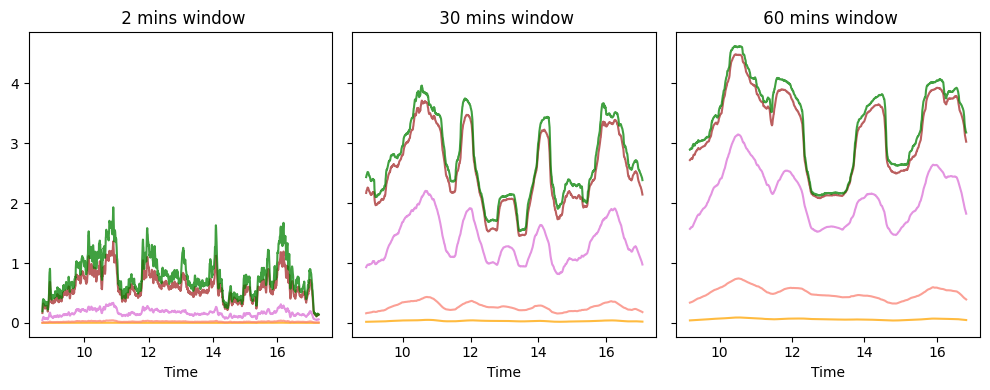

In [33]:
#Plot 5
list_colors = ['orange',  'salmon',  'orchid',  'brown', 'green', 'lightseagreen']
indices_plot = [0, 1, 2]


fig, ax = plt.subplots(1, 3, figsize = (10, 4), sharey=True)
for j, window in enumerate(windows):
    window_S_selected = []
    for i, lamda in enumerate(selected_lamdas):
        with open(f'//scratch/tmp/180/skoove/primaryschoolnet_rw/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
            S_rate = pickle.load(f)
            window_S_selected.append(S_rate['window_S'][f'{lamda:.11f}'])

    if j == 0:
        for i, lamda in enumerate(selected_lamdas):
            S = window_S_selected[i]
            ax[indices_plot[j]].plot(net_times_hours[(window // 2)+1 :1556- (window // 2)], S[1:1556-window], color = list_colors[i], alpha = 0.75, label='lamda = ' + f'{lamda:.5f}')
            ax[indices_plot[j]].set_xlabel('Time')
    else:
        for i, lamda in enumerate(selected_lamdas):
            S = window_S_selected[i]
            ax[indices_plot[j]].plot(net_times_hours[(window // 2)+1 :1556- (window // 2)], S[1:1556-window], color = list_colors[i], alpha = 0.75)
            ax[indices_plot[j]].set_xlabel('Time')

    ax[indices_plot[j]].set_title(f' {window // 3} mins window')
    

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
#fig.legend(lines, labels, fontsize='xx-small', bbox_to_anchor=(0.85,0), ncol=5)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/primary_school/primary_school_windows_talk2.png', format='png', dpi=300, bbox_inches='tight')
plt.show()